# Titanic Classification Exercise

Welcome to your first classification exercise! In this notebook, you'll work with the famous Titanic dataset to predict passenger survival.

## About the Dataset

The Titanic dataset is one of the most popular beginner datasets in machine learning. It contains passenger information from the RMS Titanic, which tragically sank on April 15, 1912. Out of the 2,224 passengers and crew aboard, 1,502 people lost their lives.

**Dataset Details:**
- **Source:** [Kaggle - Titanic Dataset](https://www.kaggle.com/datasets/yasserh/titanic-dataset)
- **Task:** Binary Classification (Survived: 0 = No, 1 = Yes)
- **Features:** Name, age, gender, socio-economic class, ticket information, cabin, port of embarkation
- **Goal:** Predict whether a passenger survived based on their characteristics

**Why this dataset?**
- Perfect introduction to classification problems
- Real historical data with meaningful context
- Contains both numerical and categorical features
- Requires data cleaning and feature engineering
- Demonstrates the impact of socio-economic factors on survival

## Learning Objectives:
1. **Explore** the data through visualizations and statistics (EDA)
2. **Engineer** features to improve prediction accuracy
3. **Split** data properly for training and testing
4. **Train** multiple classification algorithms
5. **Evaluate** model performance using various metrics
6. **Optimize** hyperparameters using Grid Search

## Models to explore:
- **Logistic Regression** - Linear approach for classification
- **K-Nearest Neighbors (KNN)** - Instance-based learning
- **Support Vector Machine (SVM)** - Powerful boundary-finding algorithm

**Time: ~50 minutes**

Let's dive in and see what stories the data tells us! 🚢

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

## 1. Load and Explore Data (EDA)

First, let's load the Titanic dataset and understand what we're working with.

In [5]:
# Load the dataset
df = pd.read_csv(f'Titanic-Dataset.csv')

# First look at the data
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# TODO: Explore the dataset structure
# Hint: Use .info() to see data types and missing values
# Hint: Use .describe() for numerical summaries
# Hint: Check unique values in categorical columns

# Your code here:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
alive=df['Survived'].sum()
dead=df['Survived'].size-alive
print(alive)
print(dead)
print(df['Survived'].size)

342
549
891


In [25]:

# TODO: Visualize survival rates
# Hint: Create a countplot for 'Survived'
# Hint: Calculate survival percentage

# Your code here:
percentage= alive/df['Survived'].size

print(percentage)

0.3838383838383838


In [40]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='Sex', ylabel='Survived'>

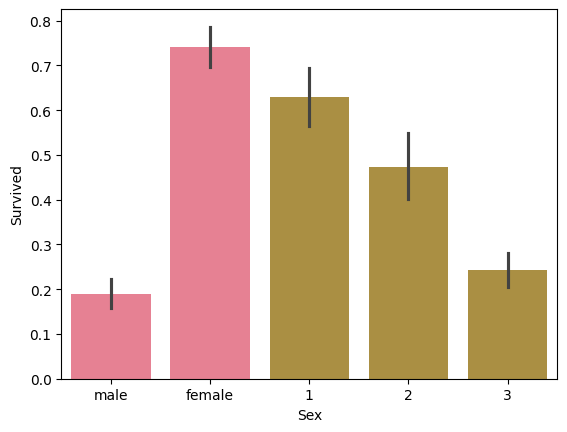

In [49]:
# TODO: Explore relationships between features and survival
# Hint: Try survival by Sex, Pclass, Age groups
# Hint: Use sns.barplot() or crosstab with percentages
# Question: Which features seem most important for survival?

# Your code here:
sns.barplot( df,x='Sex', y='Survived')
sns.barplot( df,x='Pclass', y='Survived' )



<Axes: xlabel='Age', ylabel='Survived'>

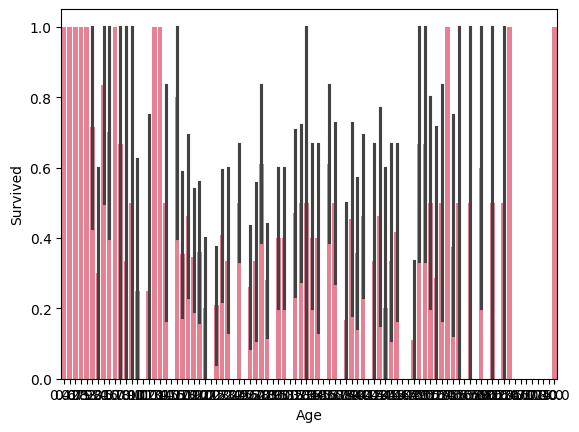

In [50]:
sns.barplot( df,x='Age', y='Survived' )

## 2. Data Engineering

Now let's clean and prepare the data for machine learning.

In [51]:
# Check missing values
print("Missing values:")
print(df.isnull().sum())
print(f"\nTotal missing: {df.isnull().sum().sum()}")

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Total missing: 866


In [75]:
# TODO: Handle missing values
# Hint: Age - fill with median or mean

# Hint: Embarked - fill with mode (most common value)

# Hint: Cabin has too many missing values - consider dropping or creating 'has_cabin' feature

# Create a copy to work with
df_clean = df.copy()

# Your code here:
df_clean['Age']=df_clean['Age'].fillna(df_clean['Age'].median())
df_clean['Embarked']=df_clean['Embarked'].fillna(df_clean['Embarked'].mode())
df_clean['Cabin']=df_clean['Cabin'].dropna()





np.int64(891)

In [ ]:
# TODO: Feature Engineering
# Hint: Create 'FamilySize' = SibSp + Parch + 1
# Hint: Create 'IsAlone' feature (1 if FamilySize == 1, else 0)
# Hint: Extract title from Name (Mr, Mrs, Miss, etc.)
# Hint: Create age groups (Child, Adult, Senior)

# Your code here:


In [ ]:
# TODO: Encode categorical variables
# Hint: Use pd.get_dummies() for one-hot encoding
# Hint: Or use LabelEncoder for ordinal encoding
# Hint: Don't forget to encode 'Sex' and 'Embarked'

# Your code here:


## 3. Train-Test Split

Prepare your features and target, then split the data.

In [ ]:
# TODO: Prepare features and target
# Hint: Drop columns that won't be used for prediction (PassengerId, Name, Ticket, etc.)
# Hint: X should contain all features, y should be 'Survived'

# Your code here:
# X =
# y =

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {list(X.columns)}")

In [ ]:
# TODO: Split the data
# Hint: Use train_test_split with test_size=0.2 and random_state=42
# Hint: Don't forget to set stratify=y for balanced splits

# Your code here:
# X_train, X_test, y_train, y_test =

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nSurvival rate in train: {y_train.mean():.3f}")
print(f"Survival rate in test: {y_test.mean():.3f}")

## 4. Train Models

Now let's train our three different models and compare their basic performance.

In [ ]:
# Scale features (important for KNN and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled for distance-based algorithms")

### 4.1 Logistic Regression

In [ ]:
# TODO: Train Logistic Regression
# Hint: Use LogisticRegression(random_state=42)
# Hint: Fit on X_train_scaled and y_train
# Hint: Make predictions on X_test_scaled
# Hint: Calculate accuracy using accuracy_score

# Your code here:


### 4.2 K-Nearest Neighbors

In [ ]:
# TODO: Train KNN
# Hint: Try KNeighborsClassifier(n_neighbors=5) first
# Hint: Remember to use scaled data!

# Your code here:


### 4.3 Support Vector Machine

In [ ]:
# TODO: Train SVM
# Hint: Use SVC(random_state=42)
# Hint: Try kernel='rbf' first

# Your code here:


## 5. Model Evaluation

Let's evaluate our models more thoroughly.

In [ ]:
# TODO: Compare all models
# Hint: Create a summary of all model accuracies
# Hint: Use classification_report for detailed metrics
# Question: Which model performs best initially?

# Your code here:


In [ ]:
# TODO: Plot confusion matrices
# Hint: Use confusion_matrix and sns.heatmap
# Hint: Create subplots for all three models

# Your code here:


## 6. Hyperparameter Tuning with Grid Search

Now let's optimize our models using GridSearchCV.

### 6.1 Logistic Regression Grid Search

In [ ]:
# TODO: Grid Search for Logistic Regression
# Hint: Try different values of C (e.g., [0.001, 0.01, 0.1, 1, 10, 100])
# Hint: Use GridSearchCV with cv=5
# Hint: Use scoring='accuracy'

param_grid_lr = {
    'C': # TODO: Add values here
}

# Your code here:


### 6.2 KNN Grid Search

In [ ]:
# TODO: Grid Search for KNN
# Hint: Try different k values (e.g., [3, 5, 7, 9, 11, 15, 21])
# Hint: Also try different distance metrics ('minkowski', 'manhattan')

param_grid_knn = {
    'n_neighbors': # TODO,
    'metric': # TODO (optional)
}

# Your code here:


### 6.3 SVM Grid Search

In [ ]:
# TODO: Grid Search for SVM
# Hint: Try different C values [0.1, 1, 10, 100]
# Hint: Try different kernels ['linear', 'rbf']
# Hint: For rbf kernel, try different gamma values ['scale', 'auto', 0.001, 0.01]

param_grid_svm = {
    'C': # TODO,
    'kernel': # TODO,
    'gamma': # TODO (for rbf kernel)
}

# Your code here:


### 6.4 Compare Optimized Models

In [ ]:
# TODO: Compare the best models from grid search
# Hint: Use the .best_estimator_ from each grid search
# Hint: Make predictions on test set and calculate final accuracies
# Question: Which model performs best after tuning?
# Question: How much did tuning improve each model?

# Your code here:


## 7. Final Thoughts

**Reflection Questions:**
1. Which model performed best and why do you think that is?
2. Which features seemed most important for predicting survival?
3. How did hyperparameter tuning affect each model's performance?
4. What other features could you engineer to improve performance?
5. What are the trade-offs between the three algorithms?

**Next Steps:**
- Try ensemble methods (Random Forest, Gradient Boosting)
- Experiment with more feature engineering
- Try different evaluation metrics (F1-score, ROC-AUC)
- Analyze feature importance

In [ ]:
# Optional: Feature importance analysis
# TODO: If you have time, explore which features are most important
# Hint: Logistic Regression coefficients show feature importance
# Hint: You can also try permutation importance

# Your code here:
